# 编程部分

In [1]:
import cv2 as cv
import matplotlib.pylab as plt
import numpy as np
from skimage.io import imread
from skimage.transform import radon, rescale, iradon

$$
R_L\mu = \int_L\mu(x_1, x_2)dx_1dx_2
$$

$Radon$变换, 本质是对密度函数的线积分, 在某一个$\theta$下投影图是一维线

In [2]:
SL_img = imread("./Shepp-Logan.bmp", as_gray=True)
stripe_img = imread("./stripe.bmp", as_gray=True)

In [3]:
def got_snr(Img, Img_with_noise):
    return  np.sum(Img_with_noise**2) \
           /np.sum((Img-Img_with_noise)**2)

def radom_show(s, num):
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    ax1, ax2 = axes[0, 0], axes[0, 1]
    ax4, ax3 = axes[1, 0], axes[1, 1]
    
    ax1.set_title("Original")
    ax1.imshow(s, cmap=plt.cm.Greys_r)
    ax1.axis('off')
    
    theta = np.linspace(0., 180., num, endpoint=False)
    sinogram = radon(s, theta=theta, circle=True)
    ax2.set_title("Radon transform\n(Singram)")
    ax2.set_ylabel(r"$\theta \ 0:{}:{}$".format(180//num, 180-180//num))
    ax2.set_xlabel(r"$\rho$")
    ax2.imshow(sinogram.T, cmap=plt.cm.Greys_r, extent=(0, sinogram.shape[0], 0, 180), aspect='auto')
    
    reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)
    ax3.set_title("Reconstruction(Filtered back projection)")
    ax3.axis('off')
    ax3.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
    
    ax4.set_title("Original")
    ax4.imshow(s, cmap=plt.cm.Greys_r)
    ax4.axis('off')
    
#     fig.tight_layout()
    plt.show()
    print('FBP snr reconstruction error: %.3g' % got_snr(s, reconstruction_fbp))

def random_show_1(s, num=180):
    f = plt.figure(figsize=(10, 5))
    ax1 = f.add_subplot(121,title="Original")
    ax2 = f.add_subplot(122, title=r"$Radon \ transform \ (Singram) \theta= 0$")
    ax1.axis('off')
    ax1.imshow(s, cmap=plt.cm.Greys_r)
    sinogram = radon(s, theta=[0], circle=True)
    ax2.set_ylabel(r"")
    ax2.set_xlabel(r"$\rho$")
    plt.xlim(0, sinogram.shape[0])
    plt.plot(sinogram)
    f.tight_layout()
    plt.show()

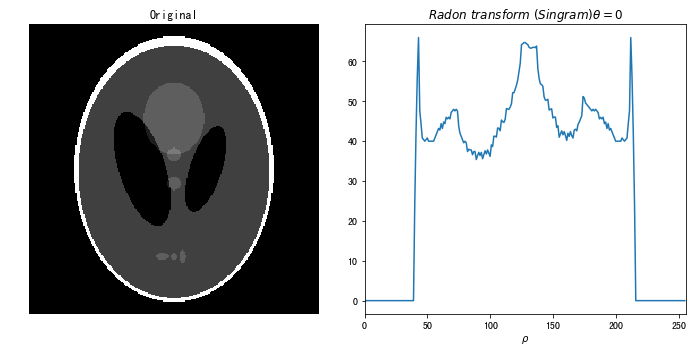

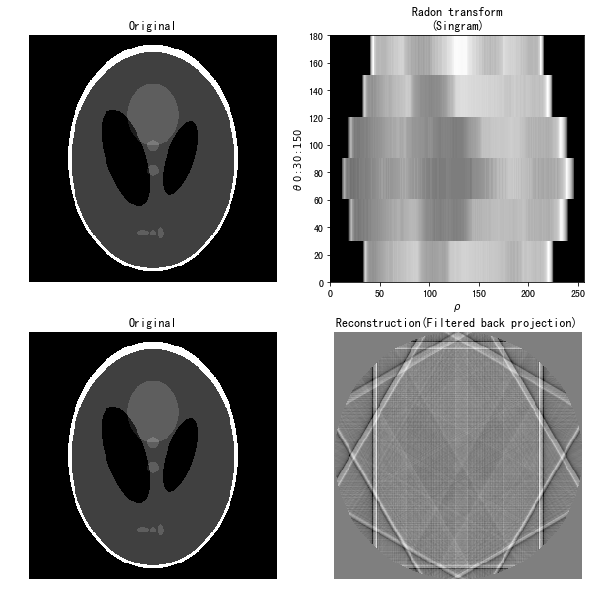

FBP snr reconstruction error: 1.3


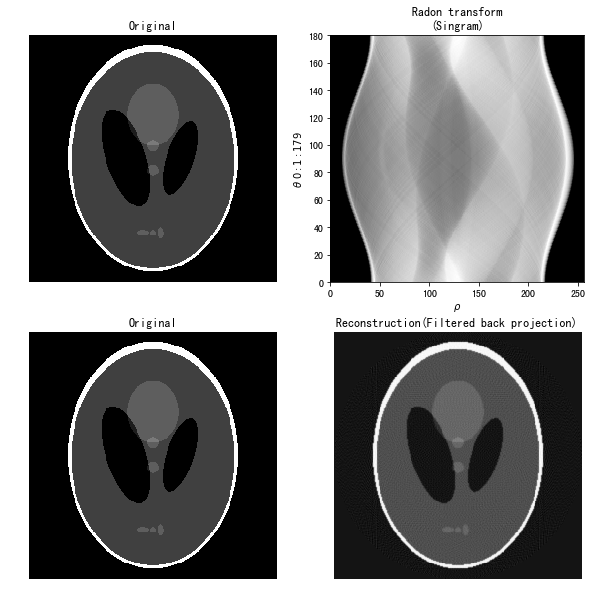

FBP snr reconstruction error: 35.4


In [4]:
random_show_1(SL_img)
radom_show(SL_img, 6)
radom_show(SL_img, 180)

/Volumes/MacMisc/anaconda3/envs/ml/lib/python3.6/site-packages/skimage/transform/radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


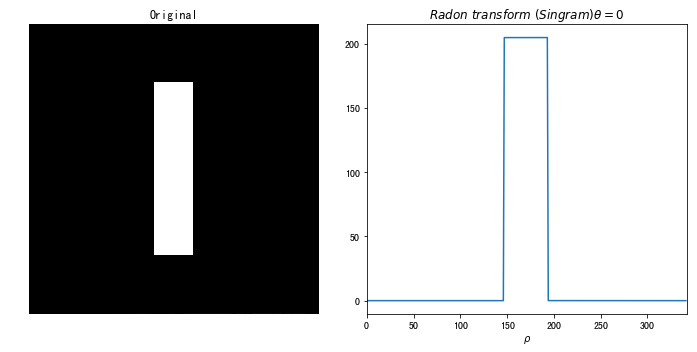

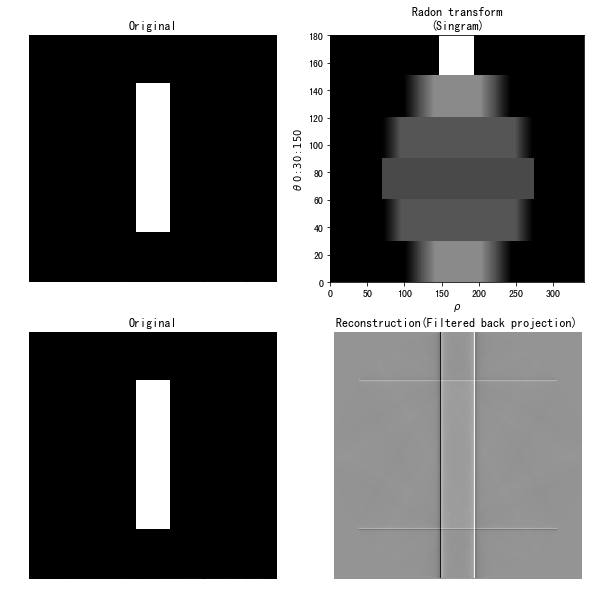

FBP snr reconstruction error: 1.1


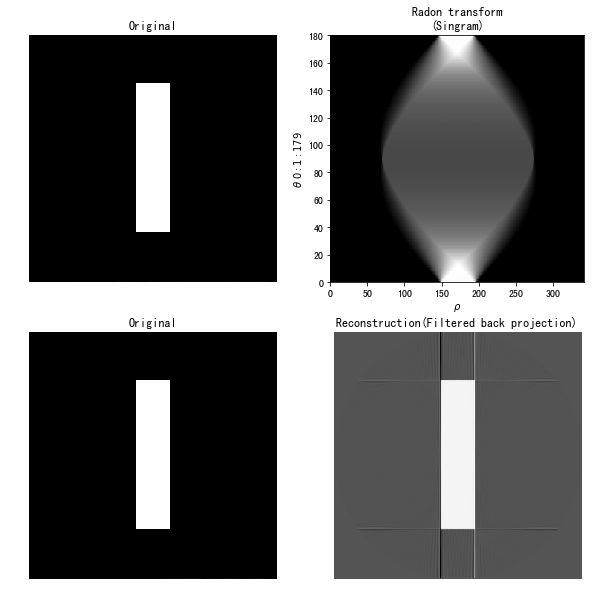

FBP snr reconstruction error: 102


In [5]:
random_show_1(stripe_img)
radom_show(stripe_img, 6)
radom_show(stripe_img, 180)

# 证明部分

1. 证明$radon$变换拉东变换是一个线性算子， 即若$f_1(x,y)\Leftrightarrow g_1(\rho, \theta),\ f_2(x,y)\Leftrightarrow g_2(\rho, \theta)$ 则
$\alpha_1f_1(x,y)+\alpha_2f_2(x,y)\Leftrightarrow\alpha_1g_1(\rho,\theta)+\alpha_2g_2(\rho,\theta)$

证明:  $$R_{f(x,y)}=g(x,y)=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(x,y)\delta(xcos\theta+ysin\theta-\rho)dxdy$$

$$
\begin{align*} R_{\alpha_1f_1(x,y)+\alpha_2f_2(x,y)}
&=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(\alpha_1f_1+\alpha_2f_2)\delta(xcos\theta+ysin\theta-\rho)dxdy \\
&=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\alpha_1f_1\delta(xcos\theta+ysin\theta-\rho)dxdy + \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\alpha_2f_2\delta(xcos\theta+ysin\theta-\rho)dxdy \\
&= \alpha_1g_1(x,y) + \alpha_2g_2(x,y)
\end{align*}
$$

2. 证明$radon$变换的平移不变性: $R_{f(x-x_0, y-y_0)}=g(\rho-x_0cos\theta-y_0sin\theta, \theta)$

$ \mathrm{let} \ p=x-x_0, q=y-y_0 $
\begin{align*}
g(\rho, \theta)
&= R_{f(x-x_0, y-y_0)}\\
 &= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(x-x_0,y-y_0)\delta(xcos\theta+ysin\theta-\rho)dpdq\\
&= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(p,q)\delta\left[ (p+x_0)cos\theta +(q+y_0)sin\theta -\rho\right]dpdq \\
&= \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(p,q)\delta\left[ (pcos\theta +qsin\theta -(\rho -x_0cos\theta-y_0sin\theta)\right]dpdq \\
&=g(\rho-x_0cos\theta-y_0sin\theta, \theta)
\end{align*}

